In [2]:
%run ./../../utils/commonImports.py
%run ./../../utils/tradingImports.py
%matplotlib inline

# Make Labels

In [ ]:
df = read_tsv('D:\\Dropbox\\My work\\krypl-project\\analysis\\return-01-within-day.tsv')
df['label'] = (df['maxReturn'] > 0.01) & (df['minReturn'] > -0.01)
write_tsv(df, 'D:\\Dropbox\\My work\\krypl-project\\dataLabeled\\return-01-loss-max-01-within-day.tsv')

In [ ]:
df

# Explore

In [3]:
df = read_tsv('D:\\Dropbox\\My work\\krypl-project\\dataLabeled\\return-01-loss-max-01-within-day.tsv')
df.head()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date,maxReturn,tillMax,minReturn,label
0,1424372400,5min,225.0000,225.0000,225.0000,225.0000,1.0000,0.0044,225.0000,2015-02-19 20:00:00,0.0667,15,0.0000,True
1,1424373000,5min,225.0000,225.0000,225.0000,225.0000,1.0000,0.0044,225.0000,2015-02-19 20:10:00,0.0667,14,0.0000,True
2,1424373300,5min,225.0000,225.0000,225.0000,225.0000,0.0000,0.0000,225.0000,2015-02-19 20:15:00,0.0667,13,0.0000,True
3,1424373600,5min,225.0000,225.0000,225.0000,225.0000,0.0000,0.0000,225.0000,2015-02-19 20:20:00,0.0667,12,0.0000,True
4,1424373900,5min,225.0000,225.0000,225.0000,225.0000,0.0000,0.0000,225.0000,2015-02-19 20:25:00,0.0667,11,0.0000,True


<IPython.core.display.Javascript object>


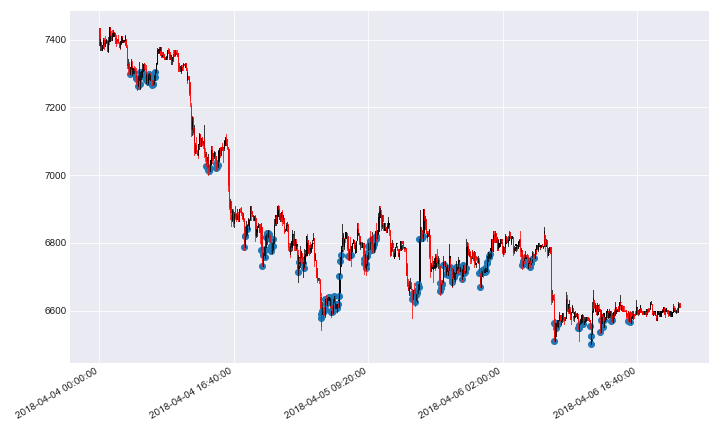

In [41]:
%matplotlib notebook

restricted = df.query("date > '2018-04-04'").query("date < '2018-04-07'")
plot_candles(restricted);


restricted['index'] = range(len(restricted))
labels = restricted.query('label')
plt.scatter(labels['index'], labels['close'])

<IPython.core.display.Javascript object>


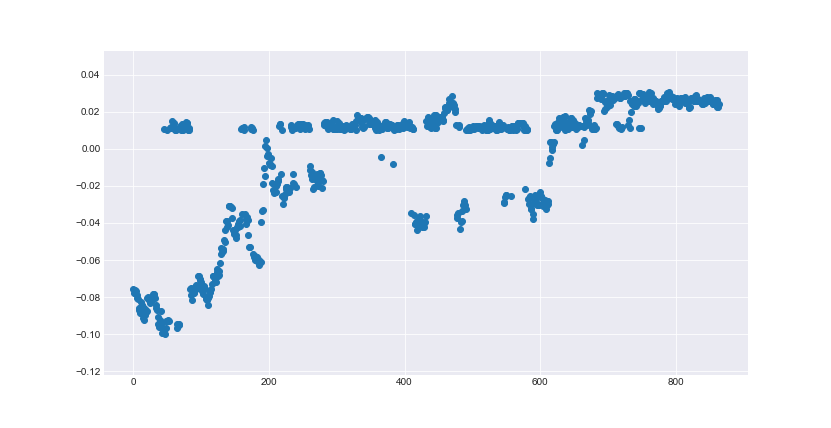

In [42]:
plt.figure()
plt.scatter(restricted['index'], restricted['maxReturn'])

In [7]:
trues = df.query('label')
falses = df.query('not label')

trues['price'] = trues['close']
falses['price'] = falses['close']

cols = ['timestamp', 'price']

write_tsv(trues[cols], '/tmp/Candles/trues.tsv')
write_tsv(falses[cols], '/tmp/Candles/falses.tsv')

C:\Anaconda3\envs\crypto36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda3\envs\crypto36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
